Exploratory Data Analysis: Week2

I'm going to Data pre-processing steps 

In [2]:
#first we need import stuff for drawing plots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Grabing Data

In [4]:
#opening data frame

step_data = pd.read_csv("steps.csv", sep=";")
survey_data = pd.read_csv('survey.csv')

In [5]:
#combining two dataframes and showing the head of new dataframe

df = survey_data.merge(step_data, on = "id")
df.head(5)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'm going to combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean().

In [8]:
df.loc[0, :]

id                  1
city         Bordeaux
gender           Male
age             25-34
hh_size             4
               ...   
9-5-2014          NaN
10-5-2014         NaN
11-5-2014         NaN
12-5-2014         NaN
13-5-2014         NaN
Name: 0, Length: 337, dtype: object

In [10]:
df.loc[:, 'weight']

0      98.0
1      77.0
2      83.0
3      80.0
4      61.0
       ... 
924    59.0
925    90.0
926    71.0
927    65.0
928    76.0
Name: weight, Length: 929, dtype: float64

In [11]:
df.loc[:, ['height', 'weight']]

,height,weight
0,178.0,98.0
1,180.0,77.0
2,180.0,83.0
3,178.0,80.0
4,167.0,61.0
...,...,...
924,165.0,59.0
925,192.0,90.0
926,181.0,71.0
927,172.0,65.0


In [14]:
print('mean: ' + str(float(df[['height']].mean())))
print('weight: ' + str(float(df[['weight']].mean())))

mean: 171.66810344827587
weight: 72.83387270765911


In [15]:
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean()
print(mean_steps)

20-6-2013     3642.416667
21-6-2013     9034.724280
22-6-2013    10889.636691
23-6-2013     7402.847973
24-6-2013     8110.370056
                 ...     
9-5-2014      9570.690141
10-5-2014     7614.848837
11-5-2014     6805.925926
12-5-2014     7505.530303
13-5-2014             NaN
Length: 328, dtype: float64


In [23]:
df = df[df['height']< 200]
df = df[df['height']> 150]
df = df[df['weight']<110]
df = df[df['weight']>50]
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,meansteps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [32]:
#mean of each person steps [20-06-2013 to 13-05-2014]

df['meansteps'] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1)
print(df)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

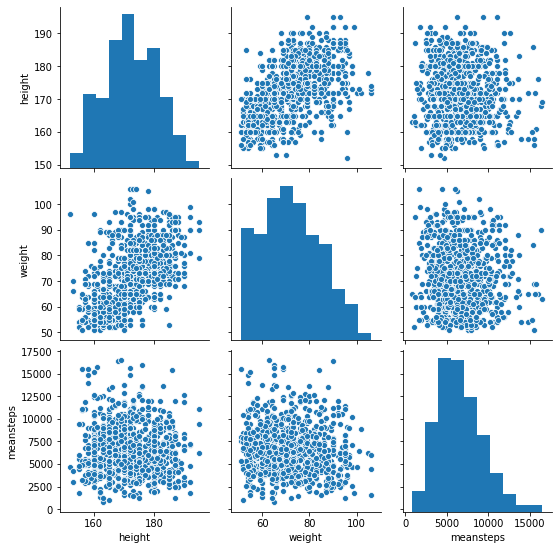

In [31]:
# Scatter plots of a variable with the 2 other variables 

dfs = df[['height', 'weight', 'meansteps']]
dfs = df_sub.dropna()
sns.pairplot(df_sub)
plt.show()

In [33]:
Corr = df[['height', 'weight', 'meansteps']].corr()
Corr.head()

,height,weight,meansteps
height,1.000000,0.563587,-0.044770
weight,0.563587,1.000000,-0.071124
meansteps,-0.044770,-0.071124,1.000000


In [35]:
dfs1 = df[['education_1', 'meansteps']]
dfs1.head()

,education_1,meansteps
0,Master or doctorate,10205.521212
1,Bachelor,5687.423313
2,Master or doctorate,8301.729730
3,Bachelor,3633.200000
4,Bachelor,5312.129630


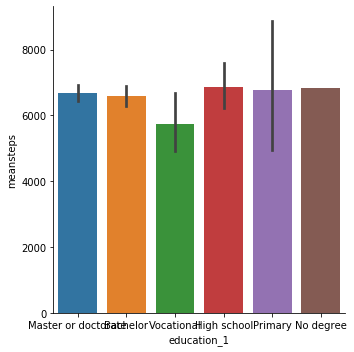

In [36]:
#relation graphs

sns.catplot(x='education_1', y='meansteps', kind = "bar", data= dfs1)

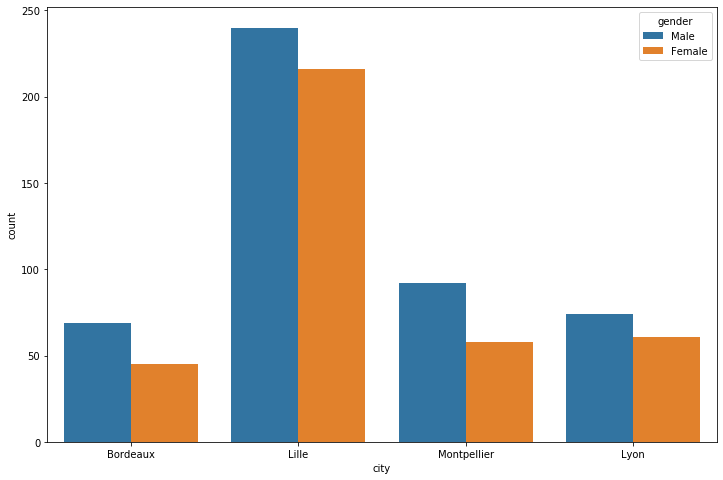

In [39]:
plt.figure(figsize=(12, 8)) 
sns.countplot(x='city', hue='gender', data=df)
plt.show()